# TITANIC

In [1]:
import numpy as np
import pandas as pd
from os import chdir

In [2]:
chdir('C:/Users/82105/Desktop/kg/2) titanic')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


- 불필요한 컬럼 삭제 : PassengerId, Name

In [4]:
df_train.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
df_train.head()
df_test.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

## Data Processing

### 이상치 제거

In [5]:
#df_train.pivot_table(...)

### target variable

- Survived / 0 No / 1 Yes

In [6]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Features engineering

- 설명변수 하나씩 뜯어보기

In [7]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
# index = df_train[df_train['Ticket'].str.match(pat='^[a-zA-Z]')].index
# value = df_train.iloc[index,6].str.split(' ', n=1, expand=True)[0]
# df_train['ticket'] = df_train.iloc[index,6].str.split(' ', n=1, expand=True)[0]

# index = df_test[df_test['Ticket'].str.match(pat='^[a-zA-Z]')].index
# value = df_test.iloc[index,5].str.split(' ', n=1, expand=True)[0]
# df_test['ticket'] = df_test.iloc[index,5].str.split(' ', n=1, expand=True)[0]

In [12]:
df_train['cabin'] = df_train['Cabin'].str.get(i=0)
df_train.head()

df_test['cabin'] = df_test['Cabin'].str.get(i=0)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cabin
0,3,male,34.5,0,0,7.8292,NaN,Q,NaN
1,3,female,47.0,1,0,7.0000,NaN,S,NaN
2,2,male,62.0,0,0,9.6875,NaN,Q,NaN
3,3,male,27.0,0,0,8.6625,NaN,S,NaN
4,3,female,22.0,1,1,12.2875,NaN,S,NaN


In [13]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cabin
0,3,male,34.5,0,0,7.8292,NaN,Q,NaN
1,3,female,47.0,1,0,7.0000,NaN,S,NaN
2,2,male,62.0,0,0,9.6875,NaN,Q,NaN
3,3,male,27.0,0,0,8.6625,NaN,S,NaN
4,3,female,22.0,1,1,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S,NaN
414,1,female,39.0,0,0,108.9000,C105,C,C
415,3,male,38.5,0,0,7.2500,NaN,S,NaN
416,3,male,NaN,0,0,8.0500,NaN,S,NaN


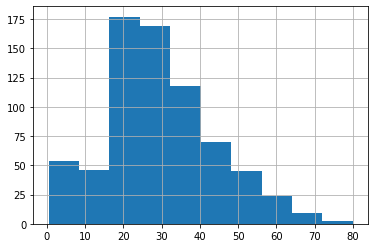

In [14]:
df_train['Age'].hist()

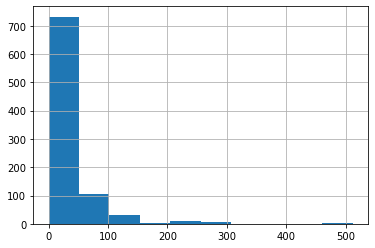

In [15]:
df_train['Fare'].hist()

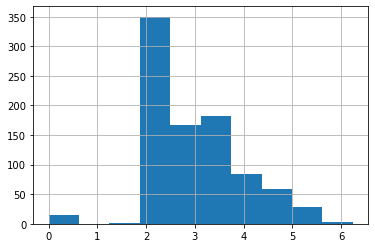

In [16]:
np.log1p(df_train['Fare']).hist()

In [17]:
df_train['Fare'] = np.log1p(df_train['Fare'])
df_test['Fare'] = np.log1p(df_test['Fare'])

- 결측치 확인 : Age(177), Cabin(687), Embarked(2)

In [18]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
cabin       687
dtype: int64

In [19]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
cabin       327
dtype: int64

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   cabin     204 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [21]:
df_train.drop(columns=['Cabin'], axis=1, inplace=True)
df_test.drop(columns=['Cabin'], axis=1, inplace=True)

In [22]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin
0,0,3,male,22.0,1,0,2.110213,S,NaN
1,1,1,female,38.0,1,0,4.280593,C,C
2,1,3,female,26.0,0,0,2.188856,S,NaN
3,1,1,female,35.0,1,0,3.990834,S,C
4,0,3,male,35.0,0,0,2.202765,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,2.639057,S,NaN
887,1,1,female,19.0,0,0,3.433987,S,B
888,0,3,female,NaN,1,2,3.196630,S,NaN
889,1,1,male,26.0,0,0,3.433987,C,C


In [23]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin
0,3,male,34.5,0,0,2.178064,Q,NaN
1,3,female,47.0,1,0,2.079442,S,NaN
2,2,male,62.0,0,0,2.369075,Q,NaN
3,3,male,27.0,0,0,2.268252,S,NaN
4,3,female,22.0,1,1,2.586824,S,NaN
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,2.202765,S,NaN
414,1,female,39.0,0,0,4.699571,C,C
415,3,male,38.5,0,0,2.110213,S,NaN
416,3,male,NaN,0,0,2.202765,S,NaN


- 상관계수 확인

In [24]:
corr = df_train.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.329862
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.661022
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.116495
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.318528
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.332186
Fare,0.329862,-0.661022,0.116495,0.318528,0.332186,1.000000


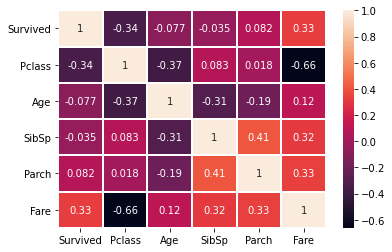

In [25]:
import seaborn as sns
sns.heatmap(corr, annot=True, linewidth=1)

In [26]:
print(df_train.shape)
print(df_test.shape)

(891, 9)
(418, 8)


- 더미화

In [27]:
y=df_train['Survived']
df_train=df_train.loc[:,df_train.columns != 'Survived']

df_full = pd.concat([df_train, df_test])
df_full = pd.get_dummies(df_full)  #(2919*77) => (2919*229)
df_train = pd.get_dummies(df_train)  #(1460*77) => (1460*229)
df_test = pd.get_dummies(df_test)  #(1459*77) => (1459*214)

In [28]:
print(df_full.shape)
print(df_train.shape)
print(df_test.shape)

(1309, 18)
(891, 18)
(418, 17)


- 결측치 처리

In [29]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer
from impyute.imputation.cs import mice
import missingno as msno

In [30]:
total_impute = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(df_full))
total_impute

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.0,22.000000,1.0,0.0,2.110213,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,38.000000,1.0,0.0,4.280593,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,2.188856,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,35.000000,1.0,0.0,3.990834,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,35.000000,0.0,0.0,2.202765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,27.447058,0.0,0.0,2.202765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,1.0,39.000000,0.0,0.0,4.699571,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1306,3.0,38.500000,0.0,0.0,2.110213,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,3.0,27.447058,0.0,0.0,2.202765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_train = total_impute[:891] 
df_test = total_impute[891:] 

In [32]:
print(df_train.shape)
print(df_test.shape)

(891, 18)
(418, 18)


## Modeling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

y_target = y
X_features = df_train
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=777)

In [34]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Root Mean Squared Error:',rmse(y_pred,y_test))

정확도 : 0.7873
Root Mean Squared Error: 0.4611795389695635


C:\Users\82105\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Root Mean Squared Error :',rmse(y_pred,y_test))

정확도 : 0.7649
Root Mean Squared Error : 0.48484495136659067


In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=11)
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X_test)

print('정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Root Mean Squared Error:',rmse(y_pred,y_test))

정확도 : 0.7873
Root Mean Squared Error: 0.4611795389695635
